In [1]:
from seamless.highlevel import Context, Transformer
ctx = Context()
ctx.code = Context()
ctx.structurestate_class = Transformer() #Until Seamless supports modules at the high level
#ctx.structurestate_class.code.mount("../struclib/StructureState.py") # bug in Seamless
ctx.code.structurestate_class >> ctx.structurestate_class.code # KLUDGE
ctx.code.structurestate_class.mount("../struclib/StructureState.py", authority="file")
ctx.structurestate_schema = ctx.structurestate_class

ctx.pdbcodes = []
ctx.render = lambda structurestate_schema, pdbcodes: None
ctx.render.structurestate_schema = ctx.structurestate_schema
ctx.render.pdbcodes = ctx.pdbcodes
ctx.code.render >> ctx.render.code
ctx.code.render.mount("render.py", authority="file")
ctx.struc = ctx.render
ctx.equilibrate()

TODO: Runtime wrapper around StructuredCell that protects against .foo = bar where .handle.foo = bar is intended
Equilibrate: waiting for: ['.translated.compiler.tf', '.translated.gen_header.tf', '.translated.translator.tf']


set()

In [2]:
import nglview as nv
view = nv.NGLWidget()
view.components = {}

def ngl_load_pdbcodes(pdbcodes):    
    if pdbcodes == list(view.components.keys()):
        return
    for code, comp in view.components.items():
        try:
            view.remove_component(comp)
        except IndexError: #some bug in NGLWidget?
            pass
    view.components.clear()
    view.clear()
    for code in pdbcodes:
        view.components[code] = view.add_component("rcsb://"+ code)
    assert pdbcodes == list(view.components.keys())
    
def ngl_set_representations(representations):
    for code, representation in representations.items():
        comp = view.components[code]
        comp.set_representations(representation)
        
def update_view():
    r = struc.ngl_representations()
    ngl_set_representations(r)    

In [3]:
t=ctx.pdbcodes.traitlet(True)
t.unobserve_all()
observer = t.observe(lambda change: ngl_load_pdbcodes(change["new"]), "value")
if t.value is not None:
    ngl_load_pdbcodes(t.value)

traitlet ('pdbcodes',):None, observing


In [4]:
ctx.pdbcodes = ["1ACB"]

In [5]:
ctx.equilibrate()
""" # non-interactive mode... have to restart Jupyter kernel for every change in StructureState.py
from struclib.StructureState import StructureState
struc = StructureState()
"""
from seamless.silk import Silk
import copy
schema = copy.deepcopy(ctx.structurestate_schema.value.data)
data = copy.deepcopy(ctx.struc.data.value)
struc = Silk(schema=schema, data=data) # ugh, need to improve the syntax...

Equilibrate: waiting for: ['.translated.render.tf']


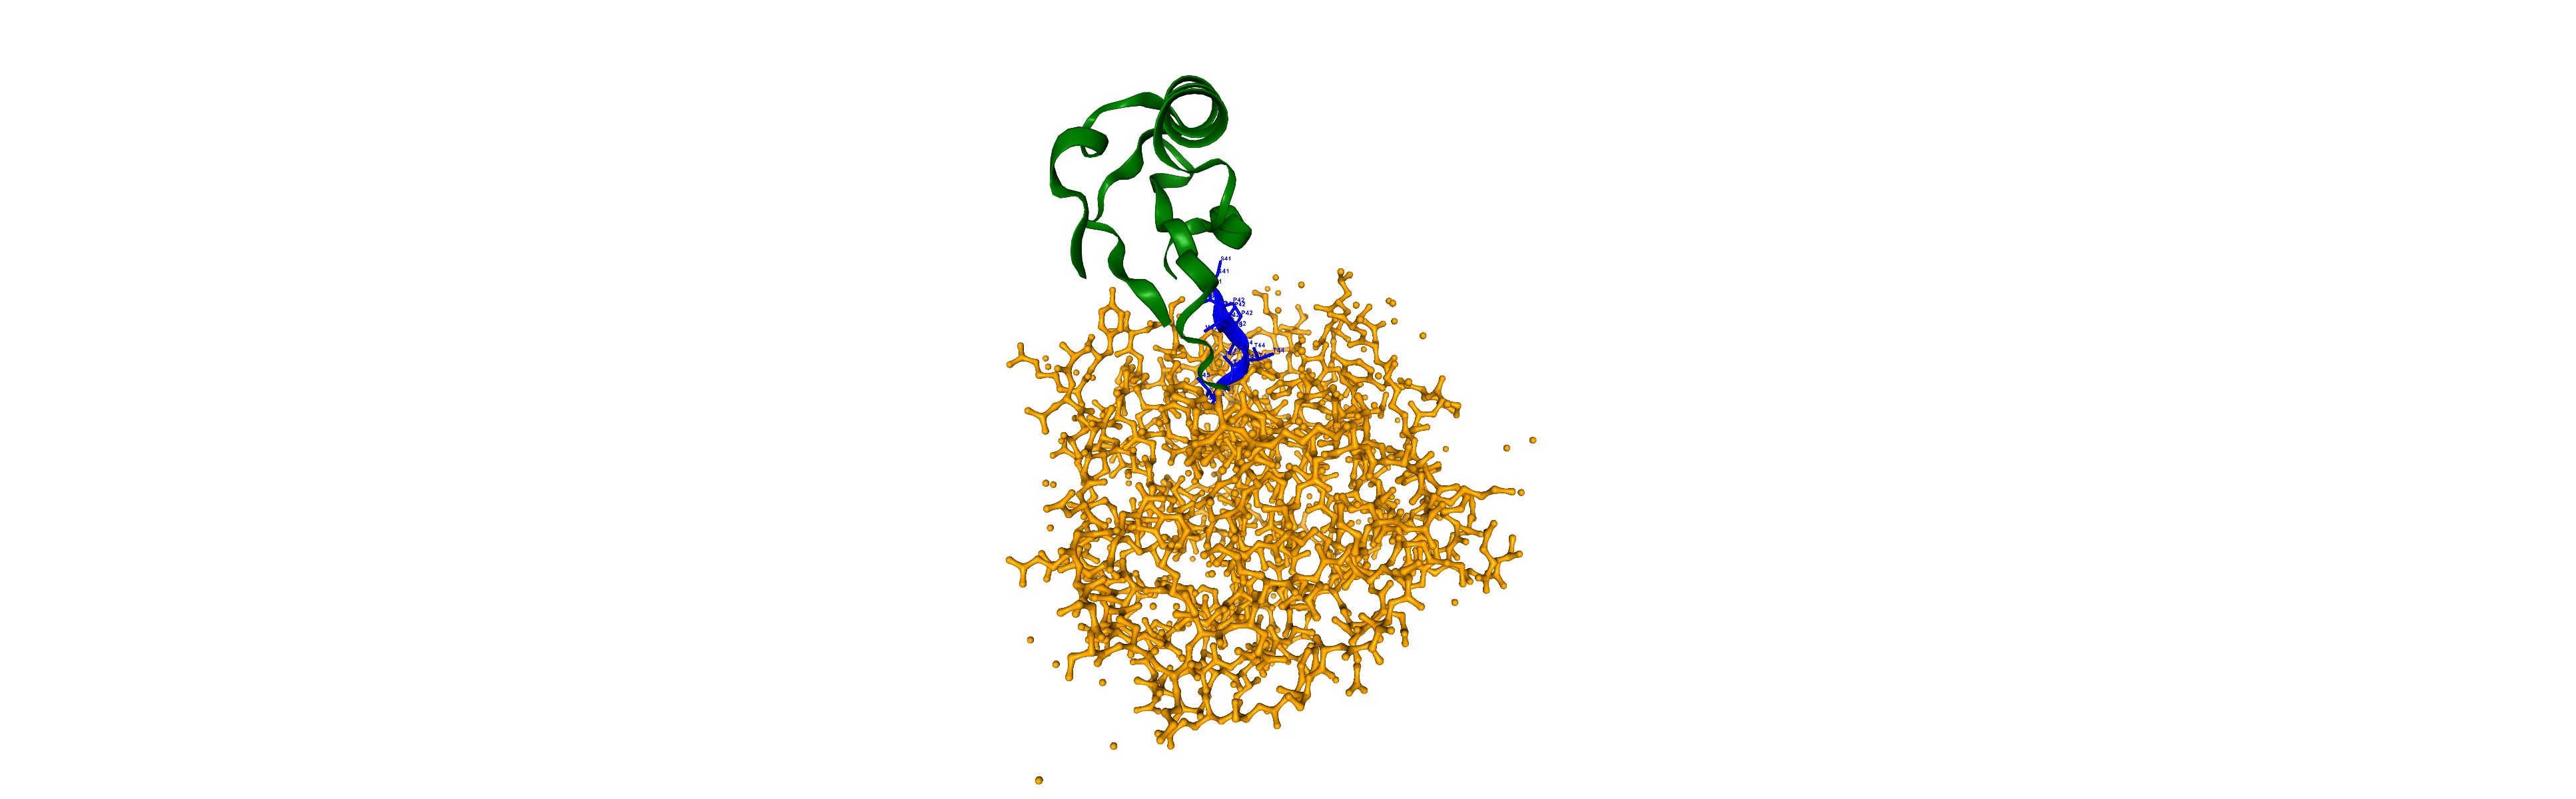

In [11]:
view
view._display_image()

In [7]:
struc.hide()
struc.select('chain == "E"')
struc.show_as("hyperball")
struc.color("orange")
struc.select('chain == "I"')
struc.show_as("cartoon")
struc.color("green")
struc.select('chain == "I" and resid > 40 and resid < 46', 'activesite')
struc.color("blue")
struc.show("licorice")
struc.show("label")
update_view()

1880 atoms selected
551 atoms selected
35 atoms selected


In [8]:
struc.get_selection()

,obj,model,hetero,name,altloc,resname,chain,index,icode,resid,x,y,z,occupancy,bfactor,segid,element,color
2046,1ACB,1,,N,,SER,I,2048,,41,13.134,20.691999,24.450001,1.0,0.0,,N,20
2047,1ACB,1,,CA,,SER,I,2049,,41,11.782,20.214001,24.219999,1.0,0.0,,C,20
2048,1ACB,1,,C,,SER,I,2050,,41,11.765,18.749001,23.716000,1.0,0.0,,C,20
2049,1ACB,1,,O,,SER,I,2051,,41,12.637,18.292999,22.938000,1.0,0.0,,O,20
2050,1ACB,1,,CB,,SER,I,2052,,41,11.015,21.099001,23.205999,1.0,0.0,,C,20
2051,1ACB,1,,OG,,SER,I,2053,,41,10.757,22.413000,23.665001,1.0,0.0,,O,20
2052,1ACB,1,,N,,PRO,I,2054,,42,10.722,18.066999,24.097000,1.0,0.0,,N,20
2053,1ACB,1,,CA,,PRO,I,2055,,42,10.559,16.708000,23.625000,1.0,0.0,,C,20
2054,1ACB,1,,C,,PRO,I,2056,,42,9.982,16.808001,22.260000,1.0,0.0,,C,20
2055,1ACB,1,,O,,PRO,I,2057,,42,9.307,17.829000,21.961000,1.0,0.0,,O,20
